In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [169]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [170]:
data= pd.read_csv("banking.csv")

In [171]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49.0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227.0,4,999,0,nonexistent,no
1,37.0,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202.0,2,999,1,failure,no
2,78.0,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148.0,1,999,0,nonexistent,yes
3,36.0,admin.,married,university.degree,no,yes,no,telephone,may,mon,120.0,2,999,0,nonexistent,no
4,59.0,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368.0,2,999,0,nonexistent,no


In [172]:
data.describe()

,age,duration,campaign,pdays,previous
count,30825.000000,32838.000000,32950.000000,32950.000000,32950.000000
mean,40.080519,258.126683,2.560607,962.052413,0.174719
std,10.648667,259.416980,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [173]:
data.isnull().sum()

age            2125
job               0
marital           0
education         0
default           0
housing         659
loan              0
contact         659
month             0
day_of_week       0
duration        112
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [174]:
from sklearn.impute import SimpleImputer

In [175]:
imputer_mean = SimpleImputer(strategy="mean")

In [176]:
data["duration"] = imputer_mean.fit_transform(data[["duration"]])

In [177]:
data.isnull().sum()

age            2125
job               0
marital           0
education         0
default           0
housing         659
loan              0
contact         659
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [178]:
data['age'] = imputer_mean.fit_transform(data[['age']])

In [179]:
imputer_mode = SimpleImputer(strategy="most_frequent")

In [180]:
le = LabelEncoder()

In [181]:
data['housing'] = le.fit_transform(data['housing'])

In [182]:
data['contact'] = le.fit_transform(data['contact'])

In [183]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49.0,blue-collar,married,basic.9y,unknown,0,no,0,nov,wed,227.0,4,999,0,nonexistent,no
1,37.0,entrepreneur,married,university.degree,no,0,no,1,nov,wed,202.0,2,999,1,failure,no
2,78.0,retired,married,basic.4y,no,0,no,0,jul,mon,1148.0,1,999,0,nonexistent,yes
3,36.0,admin.,married,university.degree,no,2,no,1,may,mon,120.0,2,999,0,nonexistent,no
4,59.0,retired,divorced,university.degree,no,0,no,0,jun,tue,368.0,2,999,0,nonexistent,no


In [184]:
data['housing'] = imputer_mode.fit_transform(data[['housing']])
data['contact'] = imputer_mode.fit_transform(data[['contact']])

In [185]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          32950 non-null  float64
 1   job          32950 non-null  object 
 2   marital      32950 non-null  object 
 3   education    32950 non-null  object 
 4   default      32950 non-null  object 
 5   housing      32950 non-null  int32  
 6   loan         32950 non-null  object 
 7   contact      32950 non-null  int32  
 8   month        32950 non-null  object 
 9   day_of_week  32950 non-null  object 
 10  duration     32950 non-null  float64
 11  campaign     32950 non-null  int64  
 12  pdays        32950 non-null  int64  
 13  previous     32950 non-null  int64  
 14  poutcome     32950 non-null  object 
 15  y            32950 non-null  object 
dtypes: float64(2), int32(2), int64(3), object(9)
memory usage: 3.8+ MB


In [187]:
data["y"].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

Text(0.5, 1.0, 'output variable')

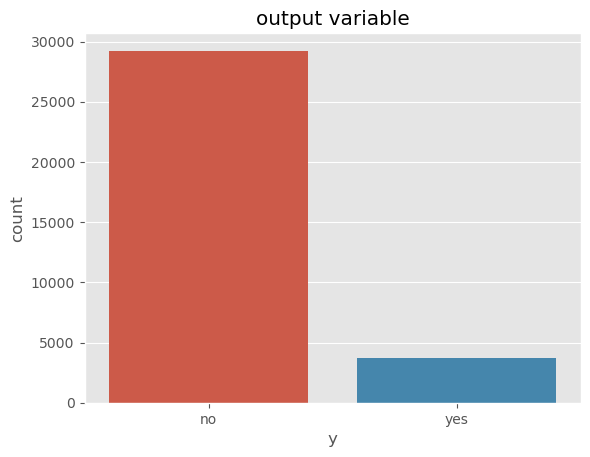

In [188]:
sns.countplot(data=data, x='y')
plt.title("output variable")

In [189]:
data['y'].value_counts()/len(data)*100

y
no     88.734446
yes    11.265554
Name: count, dtype: float64

The class distribution in the target variable is ~89:11 indicating an imbalance dataset



In [190]:
cat_vars = data.select_dtypes(include = ['object']).columns

In [191]:
cat_vars

Index(['job', 'marital', 'education', 'default', 'loan', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')

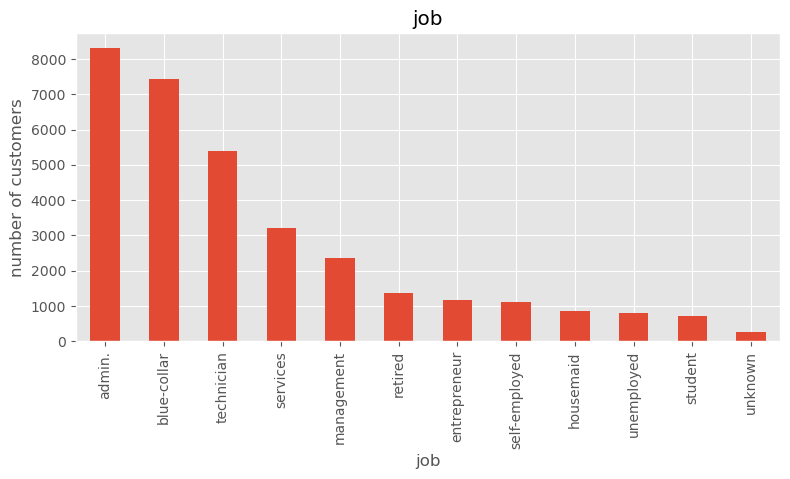

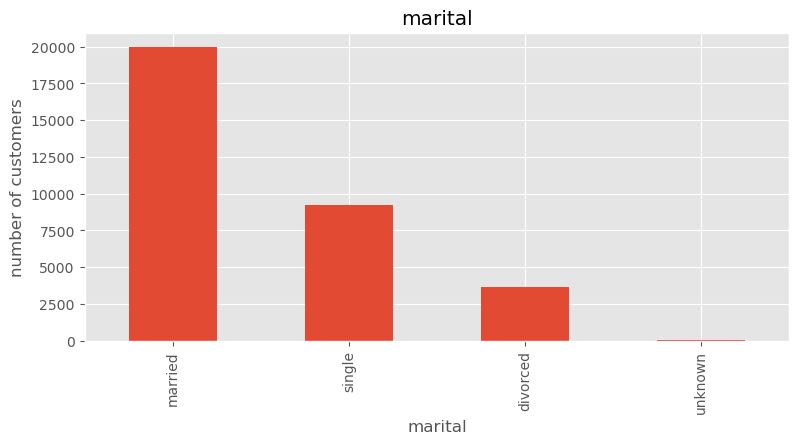

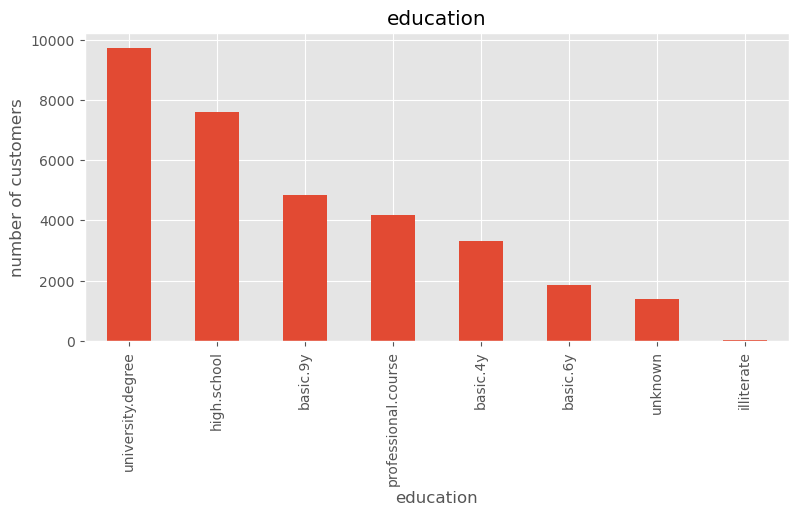

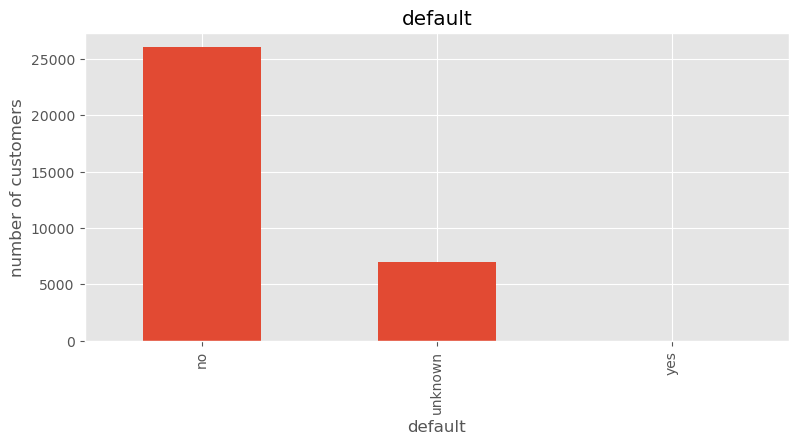

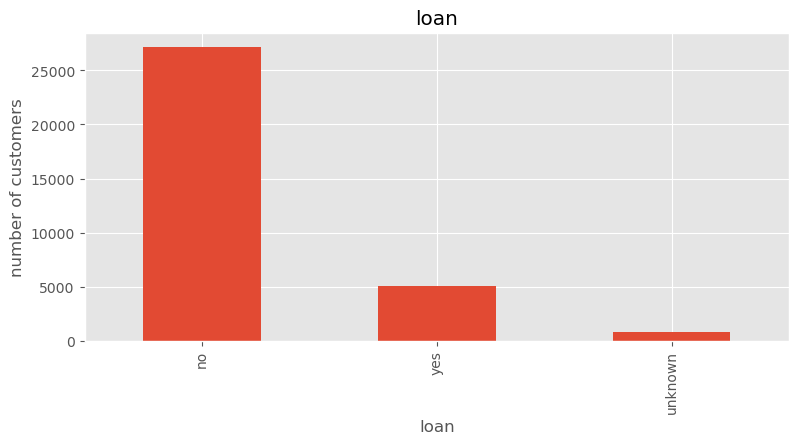

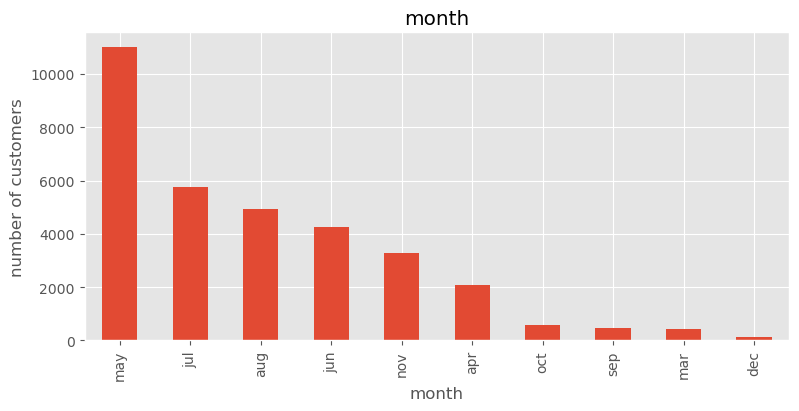

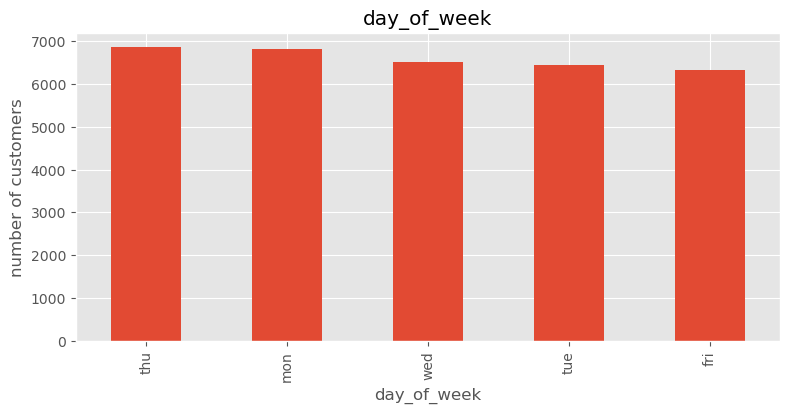

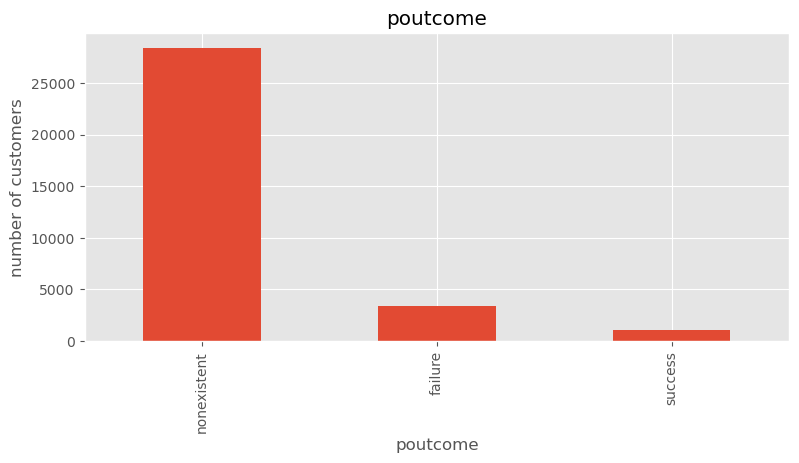

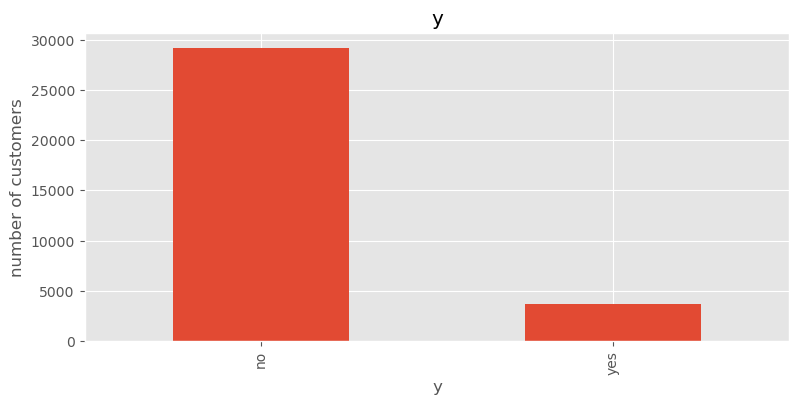

In [192]:
plt.style.use("ggplot")

for column in cat_vars:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

Observations :
The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
A huge number of the customers are married.
Majority of the customers do not have a credit in default
Many of our past customers have applied for a housing loan but very few have applied for personal loans.
Cell-phones seem to be the most favoured method of reaching out to customers.
Many customers have been contacted in the month of May.
The plot for the target variable shows heavy imbalance in the target variable.

In [193]:
for column in cat_vars:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

In [194]:
num_vars = data.select_dtypes(include = np.number)
num_vars

,age,housing,contact,duration,campaign,pdays,previous
0,49.0,0,0,227.0,4,999,0
1,37.0,0,1,202.0,2,999,1
2,78.0,0,0,1148.0,1,999,0
3,36.0,2,1,120.0,2,999,0
4,59.0,0,0,368.0,2,999,0
...,...,...,...,...,...,...,...
32945,28.0,2,0,192.0,1,999,0
32946,52.0,2,0,64.0,1,999,1
32947,54.0,0,0,131.0,4,999,0
32948,29.0,0,1,165.0,1,999,0


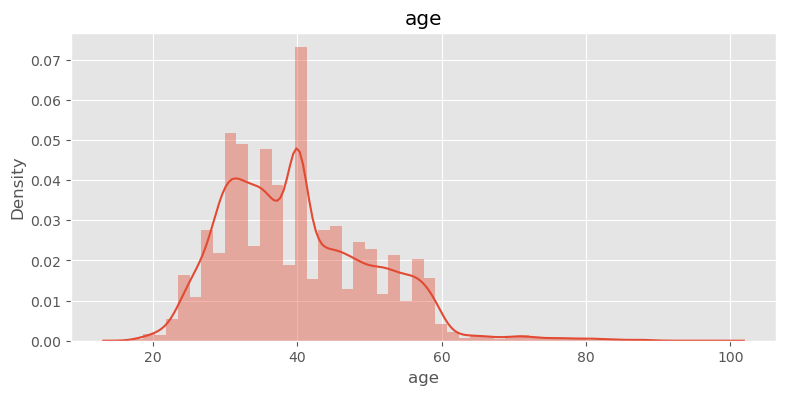

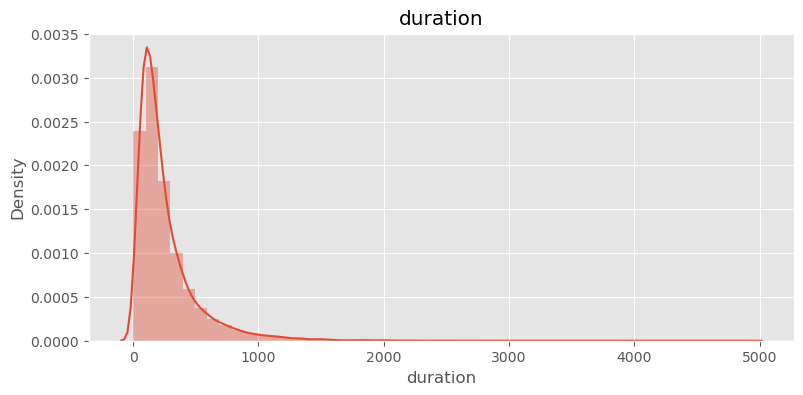

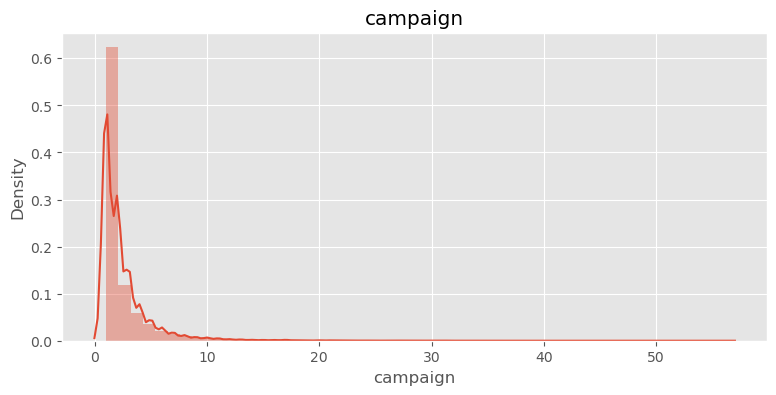

In [195]:
plt.style.use("ggplot")

for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

Observation :
As we can see from the histogram, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers .
Looking at the plot for pdays, we can infer that majority of the customers were being contacted for the first time because as per the feature description for pdays the value 999 indicates that the customer had not been contacted previously.

Since pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [196]:
data.drop(columns=['pdays','previous'],axis=1,inplace=True)

In [197]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49.0,blue-collar,married,basic.9y,no,0,no,0,nov,wed,227.0,4,nonexistent,no
1,37.0,entrepreneur,married,university.degree,no,0,no,1,nov,wed,202.0,2,failure,no
2,78.0,retired,married,basic.4y,no,0,no,0,jul,mon,1148.0,1,nonexistent,yes
3,36.0,admin.,married,university.degree,no,2,no,1,may,mon,120.0,2,nonexistent,no
4,59.0,retired,divorced,university.degree,no,0,no,0,jun,tue,368.0,2,nonexistent,no


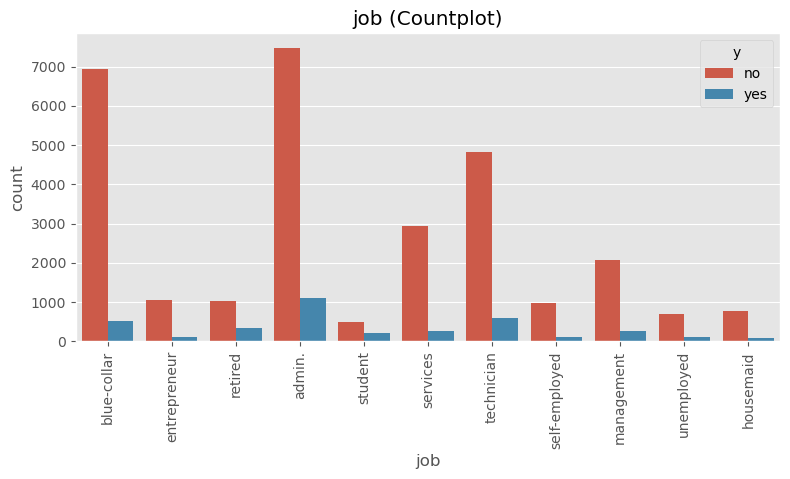

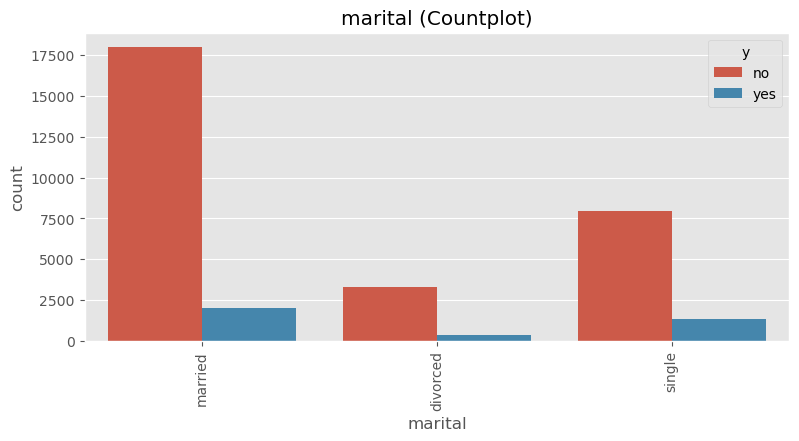

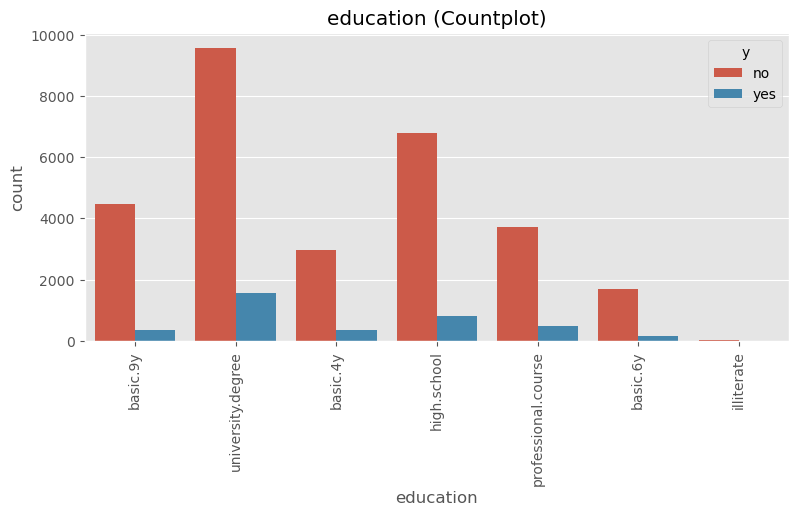

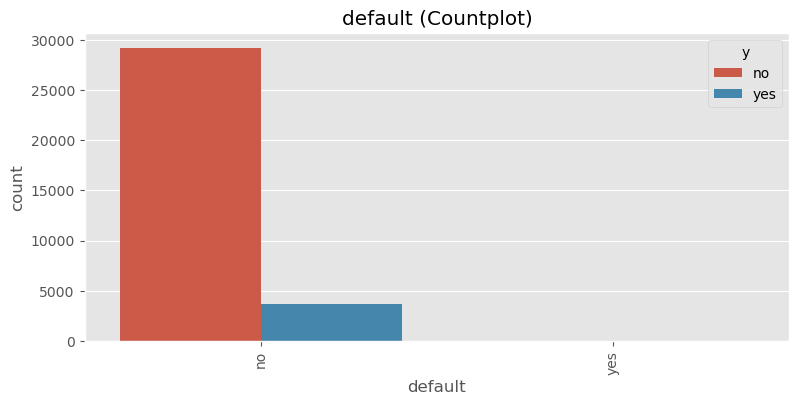

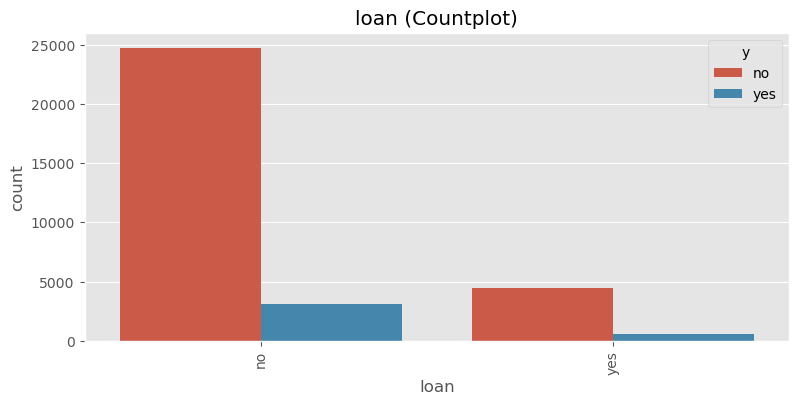

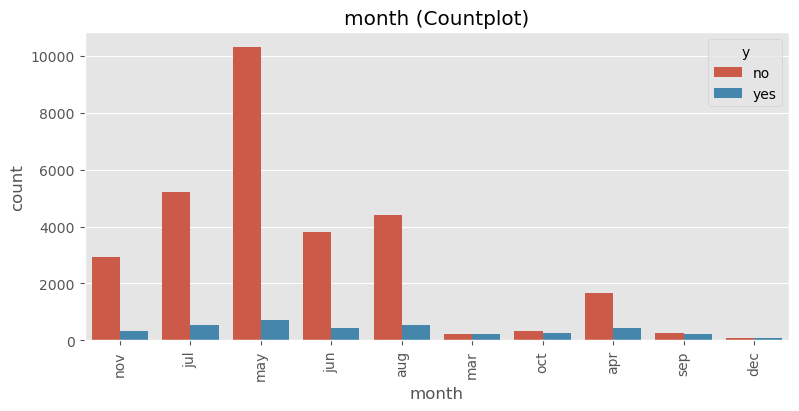

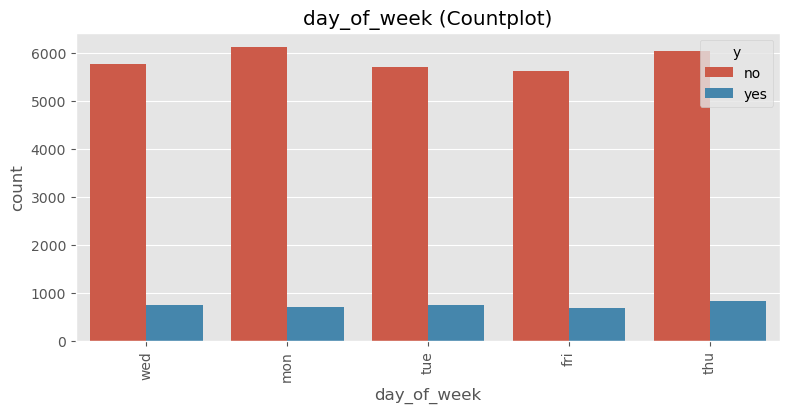

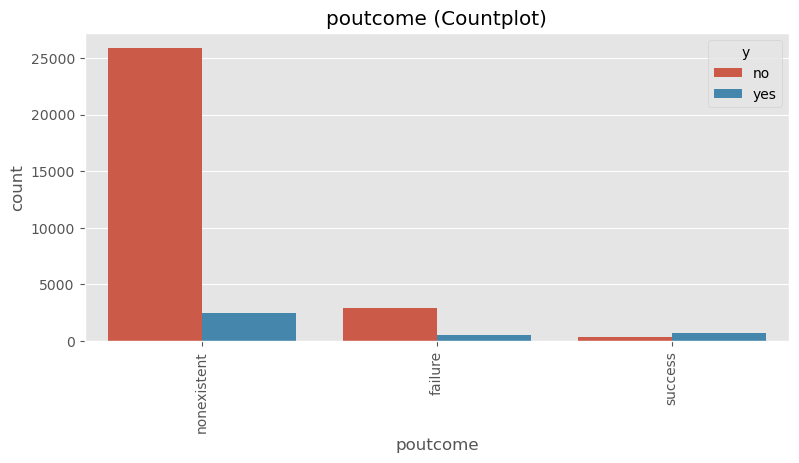

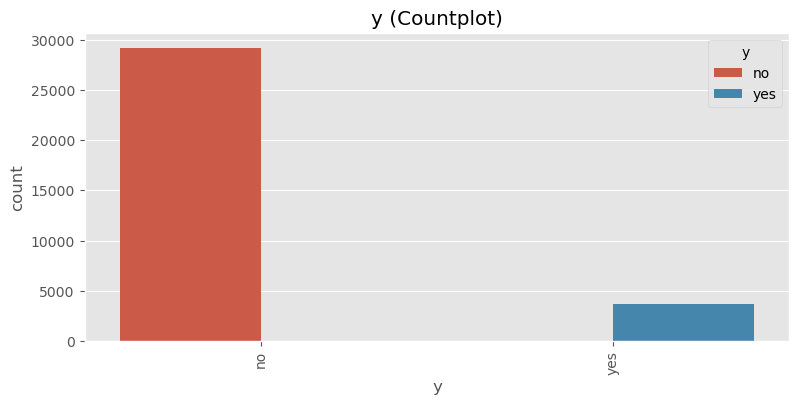

In [198]:
plt.style.use("ggplot")
for column in cat_vars:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.countplot(x=column, hue="y", data=data)
    plt.title(f"{column} (Countplot)")
    plt.xticks(rotation=90)




Observations:
Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit.
They are married
They hold a university degree
They do not hold a credit in default
Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
Cell-phones should be the preferred mode of contact for contacting customers.

In [199]:
data.describe()

,age,housing,contact,duration,campaign
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.080519,1.110410,0.398118,258.126683,2.560607
std,10.299559,1.011997,0.528799,258.975700,2.752326
min,17.000000,0.000000,0.000000,0.000000,1.000000
25%,32.000000,0.000000,0.000000,103.000000,1.000000
50%,39.000000,2.000000,0.000000,180.000000,2.000000
75%,47.000000,2.000000,1.000000,319.000000,3.000000
max,98.000000,3.000000,2.000000,4918.000000,56.000000


In [200]:
lower_boundries= []
upper_boundries= []
for i in ["age", "duration", "campaign"]:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_bound= data[i].quantile(0.25) - (1.5*IQR)
    upper_bound= data[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [201]:
lower_boundries

[9.5, -221.0, -2.0]

In [202]:
upper_boundries

[69.5, 643.0, 6.0]

In [203]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "duration", "campaign"]:
    data.loc[data[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

In [204]:
# without outliers
data.describe()

,age,housing,contact,duration,campaign
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,39.996301,1.110410,0.398118,234.923132,2.271077
std,10.012085,1.011997,0.528799,176.854137,1.546302
min,17.000000,0.000000,0.000000,0.000000,1.000000
25%,32.000000,0.000000,0.000000,103.000000,1.000000
50%,39.000000,2.000000,0.000000,180.000000,2.000000
75%,47.000000,2.000000,1.000000,319.000000,3.000000
max,69.000000,3.000000,2.000000,643.000000,6.000000


In [205]:
for i in cat_vars:
    print(i, ":", data[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
loan : ['no' 'yes']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [206]:
for f in cat_vars:
    data[f]=le.fit_transform(data[f])

In [207]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49.0,1,1,2,0,0,0,0,7,4,227.0,4,1,0
1,37.0,2,1,6,0,0,0,1,7,4,202.0,2,0,0
2,69.0,5,1,0,0,0,0,0,3,1,643.0,1,1,1
3,36.0,0,1,6,0,2,0,1,6,1,120.0,2,1,0
4,59.0,5,0,6,0,0,0,0,4,3,368.0,2,1,0


In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
sc=StandardScaler()

In [210]:
data['duration'] = sc.fit_transform(data[['duration']])

In [211]:
data['age'] = sc.fit_transform(data[['age']])

In [212]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,0.899297,1,1,2,0,0,0,0,7,4,-0.044801,4,1,0
1,-0.299273,2,1,6,0,0,0,1,7,4,-0.186163,2,0,0
2,2.896913,5,1,0,0,0,0,0,3,1,2.307456,1,1,1
3,-0.399154,0,1,6,0,2,0,1,6,1,-0.649829,2,1,0
4,1.898105,5,0,6,0,0,0,0,4,3,0.752478,2,1,0


In [213]:
# feature variables
x= data.iloc[:, :-1]

# target variable
y= data.iloc[:, -1]

<Axes: >

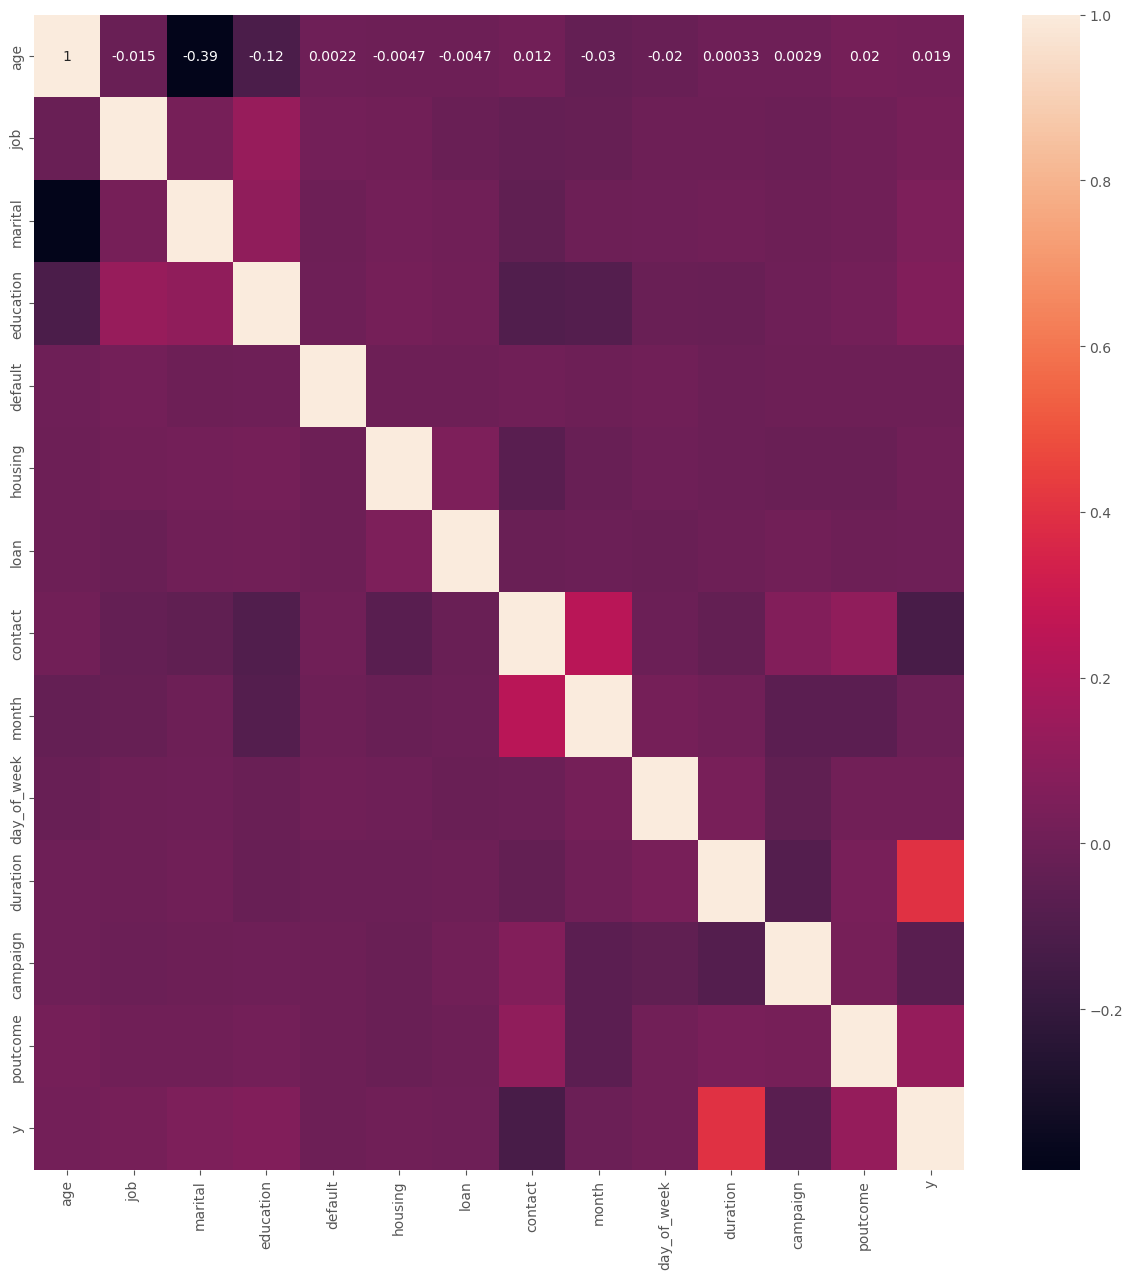

In [214]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

Handling imbalanced dataset
Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

In [215]:
smote_tomek = SMOTETomek()

# Implement oversampling to training data
x_sm, y_sm = smote_tomek.fit_resample(x, y)

In [216]:
y_sm.value_counts()

y
0    29180
1    29180
Name: count, dtype: int64

In [217]:
x_train, x_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [218]:
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=2)

# fitting the model on resampled data
gridsearch_log.fit(x_train, y_train)

# printing best score and best parameters
print("best score is:" ,gridsearch_log.best_score_)
print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.8002571017779552
best parameters are: {'C': 10.0, 'penalty': 'l2'}


[[4690 1087]
 [1221 4674]]
0.8022618231665525
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      5777
           1       0.81      0.79      0.80      5895

    accuracy                           0.80     11672
   macro avg       0.80      0.80      0.80     11672
weighted avg       0.80      0.80      0.80     11672



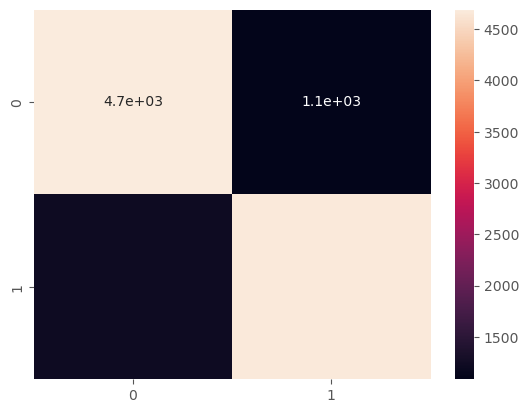

In [219]:
y_predicted= gridsearch_log.predict(x_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [220]:
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(x_train, y_train)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.902512554801927
best parameters are: {'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25, 'criterion': 'entropy'}


[[5061  716]
 [ 347 5548]]
0.9089273474982865
              precision    recall  f1-score   support

           0       0.94      0.88      0.90      5777
           1       0.89      0.94      0.91      5895

    accuracy                           0.91     11672
   macro avg       0.91      0.91      0.91     11672
weighted avg       0.91      0.91      0.91     11672



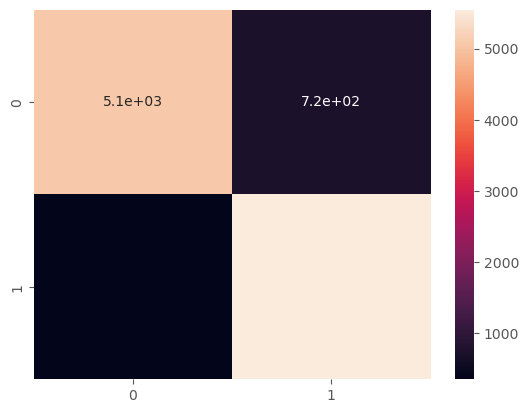

In [222]:
y_predicted_rf= randomsearch_rf.predict(x_test)

print(confusion_matrix(y_test, y_predicted_rf))
sns.heatmap(confusion_matrix(y_test, y_predicted_rf), annot=True)
print(accuracy_score(y_test, y_predicted_rf))
print(classification_report(y_test, y_predicted_rf))